Raw std: 0.028 m
Filtered std: 0.029 m
Noise reduction: -1.1%


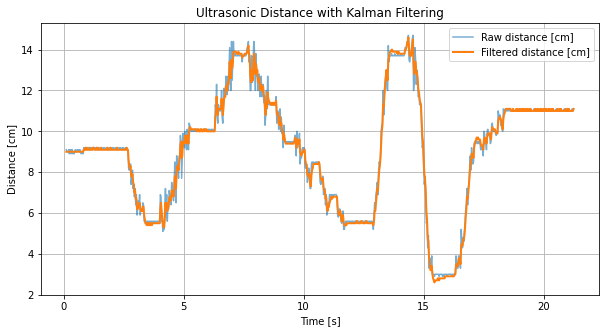

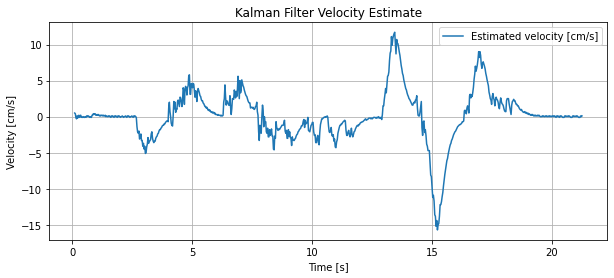

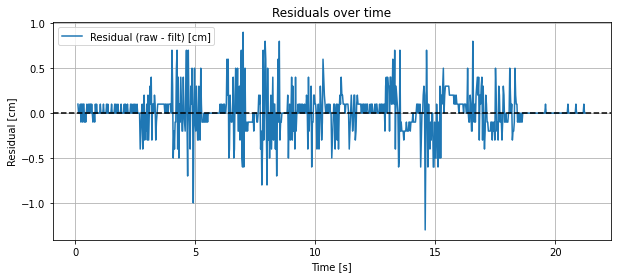

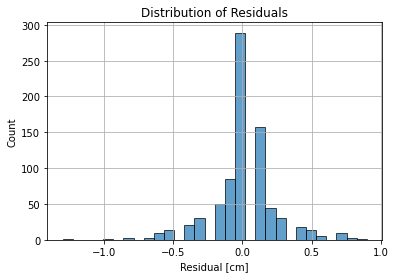

In [3]:
# Kalman Filter Ultrasonic Analysis
# Author: Dmytro Maslov, Porto, Portugal
# Reads CSV from Arduino UNO R3 (time, raw_m, filt_m, vel_m_s)
# Produces plots and RMSE analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load data ---
# Assumes CSV with headerless format: time, raw, filt, vel
# test file provides a 20 sec snapshot of the two types of activities - (i)reflecting object moves slowly and (ii) moves fast
df = pd.read_csv("test1.csv", names=["time_s", "raw_m", "filt_m", "vel_m_s"])

# --- Clean data ---
# Replace NaN strings if Arduino produced them
df.replace("NaN", np.nan, inplace=True)
df = df.astype(float)

# Drop rows where raw is missing (optional)
df = df.dropna(subset=["raw_m"])

# --- Compute basic stats ---
raw_std = df["raw_m"].std()
filt_std = df["filt_m"].std()
# provide an improvement rate for estimating the efficiency rate
improvement = (1 - filt_std / raw_std) * 100

print(f"Raw std: {raw_std:.3f} m")
print(f"Filtered std: {filt_std:.3f} m")
print(f"Noise reduction: {improvement:.1f}%")

# --- Plot raw vs filtered ---
plt.figure(figsize=(10,5))
plt.plot(df["time_s"], df["raw_m"]*100, label="Raw distance [cm]", alpha=0.6)
plt.plot(df["time_s"], df["filt_m"]*100, label="Filtered distance [cm]", linewidth=2)
plt.xlabel("Time [s]")
plt.ylabel("Distance [cm]")
plt.legend()
plt.title("Ultrasonic Distance with Kalman Filtering")
plt.grid(True)
plt.show()

# --- Plot velocity estimate ---
plt.figure(figsize=(10,4))
plt.plot(df["time_s"], df["vel_m_s"]*100, label="Estimated velocity [cm/s]")
plt.xlabel("Time [s]")
plt.ylabel("Velocity [cm/s]")
plt.legend()
plt.title("Kalman Filter Velocity Estimate")
plt.grid(True)
plt.show()

# --- Residual analysis ---
residuals = df["raw_m"] - df["filt_m"]

plt.figure(figsize=(10,4))
plt.plot(df["time_s"], residuals*100, label="Residual (raw - filt) [cm]")
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("Time [s]")
plt.ylabel("Residual [cm]")
plt.legend()
plt.title("Residuals over time")
plt.grid(True)
plt.show()

# Histogram of residuals
plt.figure(figsize=(6,4))
plt.hist(residuals*100, bins=30, alpha=0.7, edgecolor="black")
plt.xlabel("Residual [cm]")
plt.ylabel("Count")
plt.title("Distribution of Residuals")
plt.grid(True)
plt.show()
